In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, InputLayer, MaxPooling2D, Dropout, BatchNormalization, LSTM
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array
from keras.utils.vis_utils import plot_model

import numpy as np
import matplotlib.pyplot as plt
import os

from skimage import io
from skimage.transform import rescale, resize, downscale_local_mean
from PIL import Image

### Loading previous model

In [2]:
model = tf.keras.models.load_model('mlmodel');


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002D3CED3E400> and <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000002D3CED91070>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000002D3CED91880> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002D3CEDADD60>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002D3CEDADD60> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002D3CEDB55E0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002D3CEDB55E0> and <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000002D3CEDB9670>).

Two checkpoint references resolved to different objects (<tensor


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000002D3CEDE87F0> and <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000002D3CEDE8040>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000002D3CEDFC1F0> and <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000002D3CEDF7550>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dropout object at 0x000002D3CEE05AF0> and <tensorflow.python.keras.layers.core.Flatten object at 0x000002D3CEE05790>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x000002D3CEE05D00> and <tensorflow.python.keras.layers.core.Dropout object at 0x000002D3CEE05AF0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.l

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 223, 223, 32)      416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 107, 107, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 53, 53, 64)        2

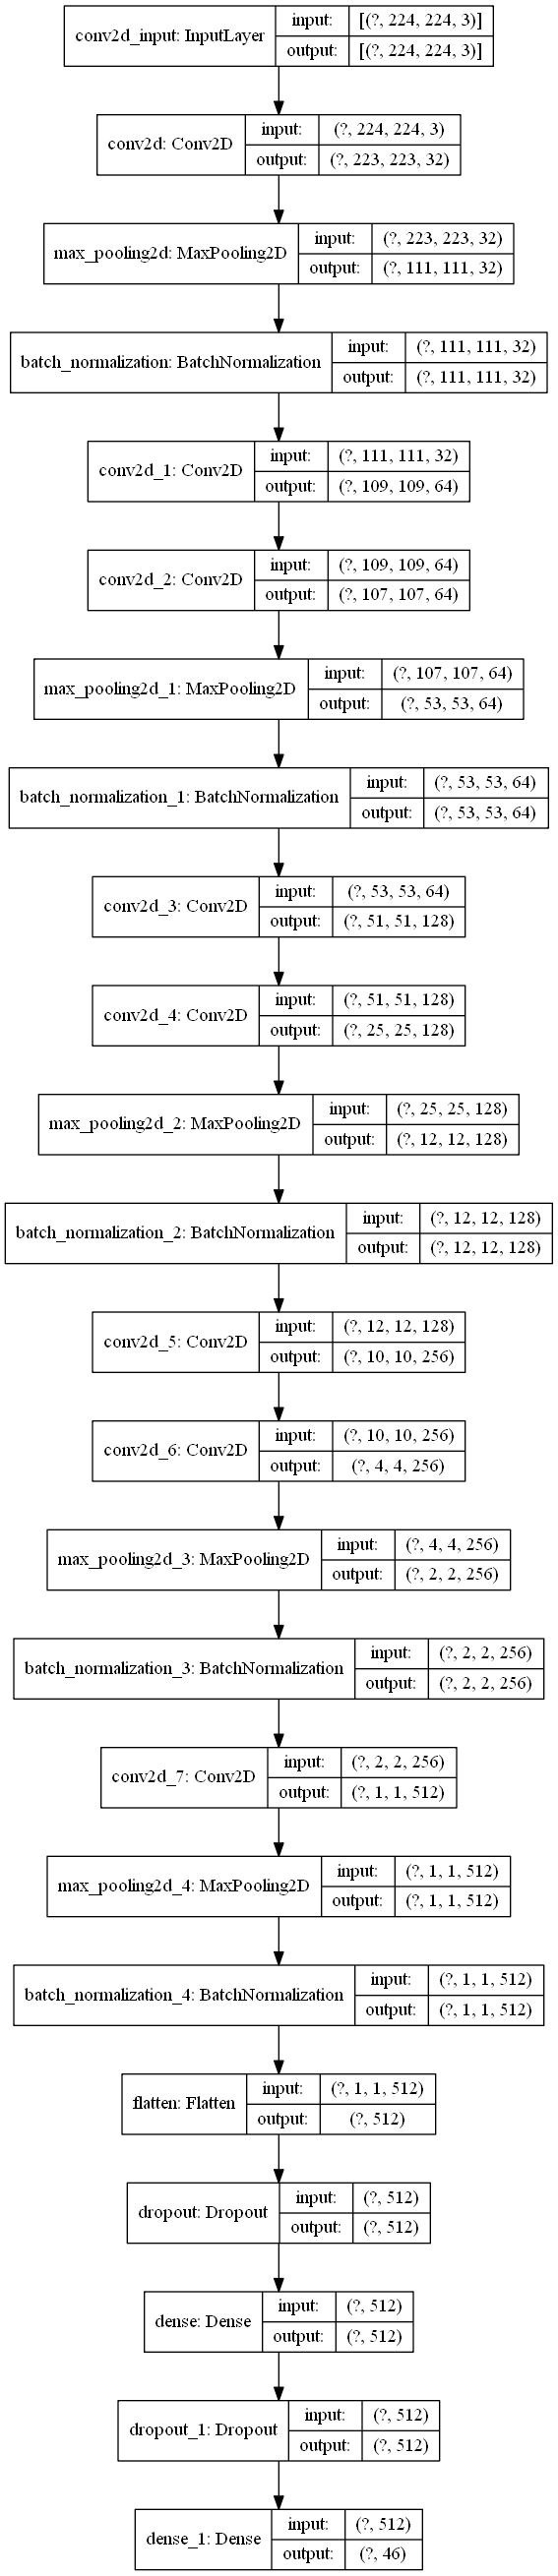

In [4]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Loading test image and classes

In [17]:
VALID_DIR = 'C:\\Users\\elisa\\Desktop\\License_conda\\alternative_dataset\\validation\\Apple Healthy\\green-apple-leaf-slice-isolated-white-ripe-background-clipping-path-45471482.jpg'

#### Read and resize image

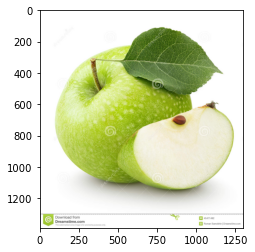

In [18]:
img = io.imread(VALID_DIR)
img_resized = resize(img, (224, 224),
                       anti_aliasing=True)
img = np.reshape(img_resized,(1,224,224,3))

imgShowable = Image.open(VALID_DIR)
imgplot = plt.imshow(imgShowable)
plt.show()

In [19]:
CLASSES_PATH = 'labels.txt'

In [20]:
with open(CLASSES_PATH) as f:
    classes = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
classes = [x.strip() for x in classes] 

### Predicting

In [21]:
arr = model.predict(img)

In [22]:
true_array = arr[0]

In [23]:
to_show = 5

# Show last to_show elements
result = true_array.argsort()[-to_show:][::-1]
result


array([ 1,  3, 25, 32, 27], dtype=int64)

### Build array of predictions and values for printing

In [24]:
predictions = []
for i in range(0, to_show):
    predictions.append(classes[result[i]])

In [25]:
values = []
for i in range(0, to_show):
    values.append(round(true_array[result[i]], 3))

### Plotting

<BarContainer object of 5 artists>

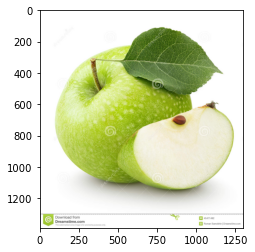

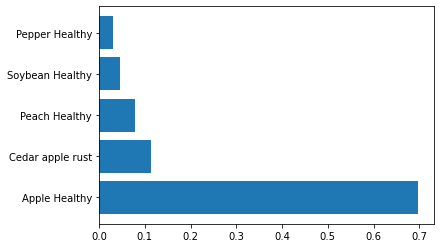

In [26]:
plt.imshow(imgShowable)

fig, ax = plt.subplots()
ax.barh(predictions, values, align='center')